In [3]:
from IPython.display import Image

## Project 1 - ECommerce

### Description

#### Problem Statement:

Amazon is an online shopping website that now caters to millions of people everywhere. Over 34,000 consumer reviews for Amazon brand products like Kindle, Fire TV Stick and more are provided. 
The dataset has attributes like brand, categories, primary categories, reviews.title, reviews.text, and the sentiment. Sentiment is a categorical variable with three levels "Positive", "Negative“, and "Neutral". For a given unseen data, the sentiment needs to be predicted.
You are required to predict Sentiment or Satisfaction of a purchase based on multiple features and review text.

#### Dataset Snapshot:

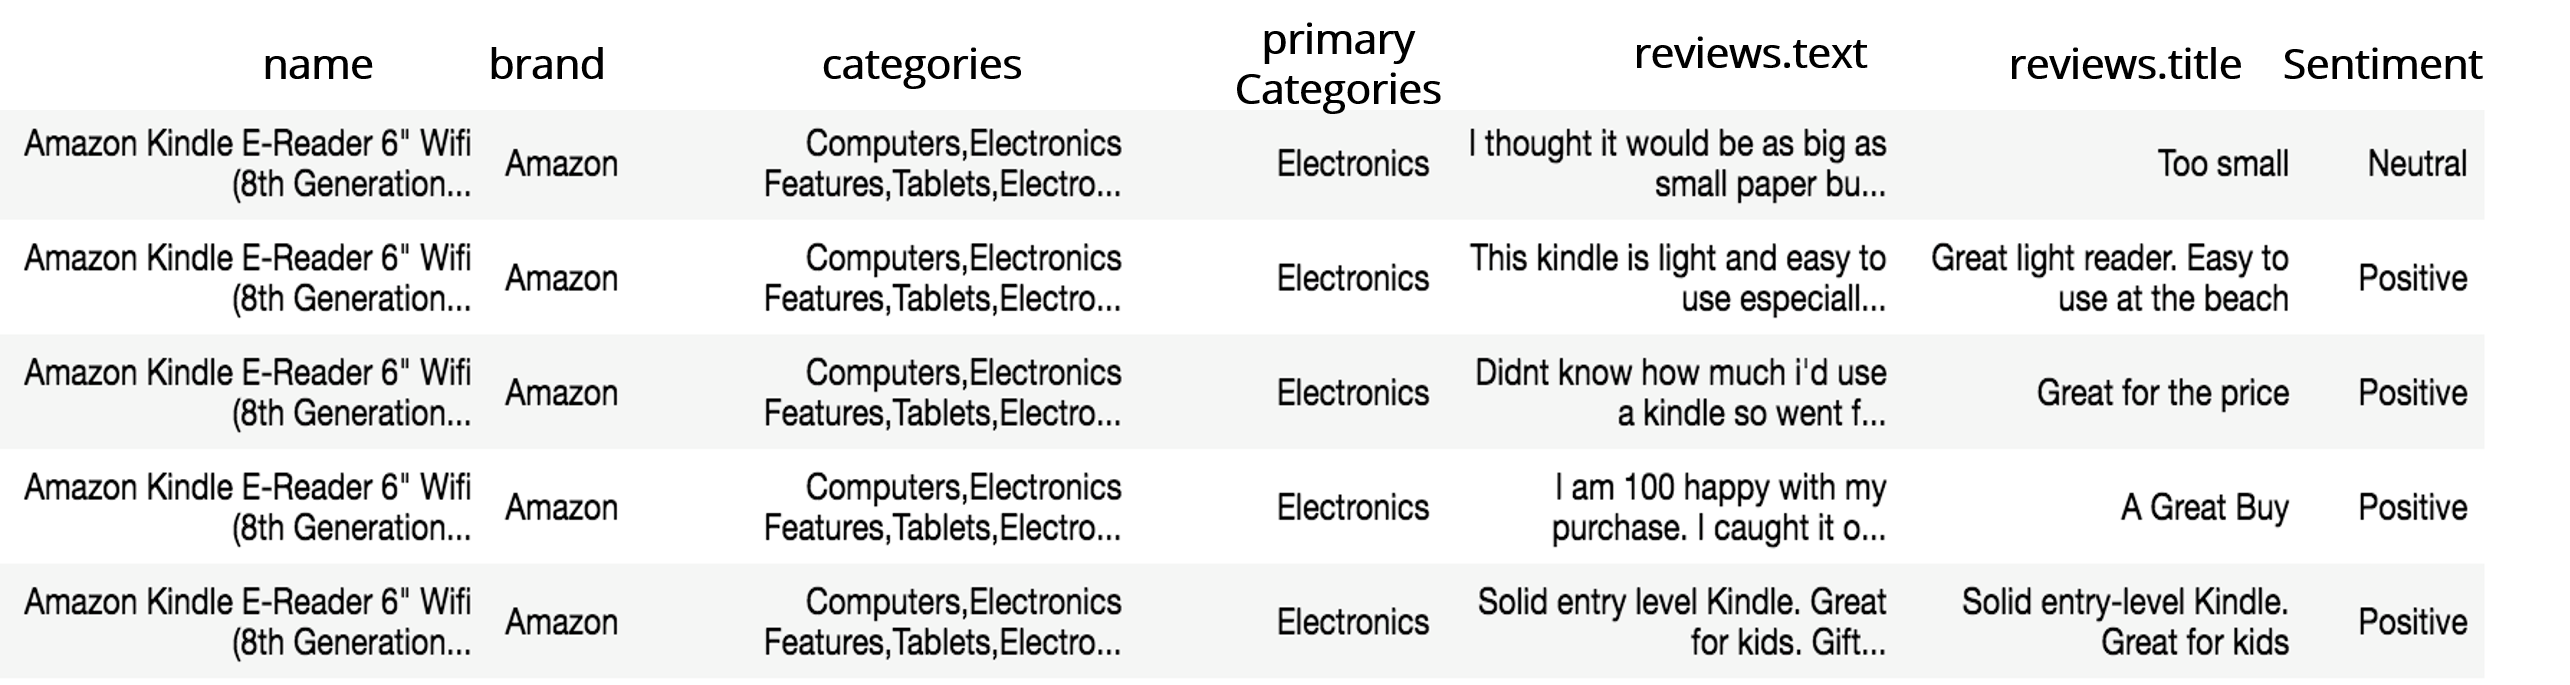

In [4]:
Image('1566552102_Picture1.png')

#### Project Task: Week 1

Class Imbalance Problem:

1. Perform an EDA on the dataset.

       a)  See what a positive, negative, and neutral review looks like

       b)  Check the class count for each class. It’s a class imbalance problem.

2. Convert the reviews in Tf-Idf score.

3. Run multinomial Naive Bayes classifier. Everything will be classified as positive because of the class imbalance.

#### Code:

In [9]:
#!pip install pandas-profiling

In [5]:
#importing the necessary packages
import pandas as pd
import pandas_profiling

In [7]:
df = pd.read_csv('train_data.csv')
df = df[['reviews.text','sentiment']]

In [8]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Observation from profiling report: 3749 Positive comments, 158 Neutral comments and 93 Negative comments.  This is an imbalanced dataset

In [3]:
df.sentiment.value_counts()

Positive    3749
Neutral      158
Negative      93
Name: sentiment, dtype: int64

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split 
import nltk
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [5]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [6]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [7]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)

In [8]:
tfidf_vect

TfidfVectorizer(analyzer=<function clean_text at 0x7f83cd27fb90>, binary=False,
                decode_error='strict', dtype=<class 'numpy.float64'>,
                encoding='utf-8', input='content', lowercase=True, max_df=1.0,
                max_features=None, min_df=1, ngram_range=(1, 1), norm='l2',
                preprocessor=None, smooth_idf=True, stop_words=None,
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [9]:
tfidf_vect.dtype

numpy.float64

In [10]:
X_tfidf = tfidf_vect.fit_transform(df['reviews.text'])

In [11]:
X_tfidf

<4000x3922 sparse matrix of type '<class 'numpy.float64'>'
	with 56193 stored elements in Compressed Sparse Row format>

In [12]:
X_features = pd.DataFrame(X_tfidf.toarray())

In [13]:
X_features.head()

,0,1,2,3,4,5,6,7,8,9,...,3912,3913,3914,3915,3916,3917,3918,3919,3920,3921
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_features, df['sentiment'], train_size = 0.8, random_state = 123)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3200, 3922)
(800, 3922)
(3200,)
(800,)


##### Multinomial Naive Bayes

In [15]:
from sklearn.naive_bayes import MultinomialNB
mdl = MultinomialNB()
mdl_nb = mdl.fit(X_train, y_train)
y_pred = mdl_nb.predict(X_test)

##### Test Data Metrics

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [17]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0   0  16]
 [  0   0  41]
 [  0   0 743]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        16
     Neutral       0.00      0.00      0.00        41
    Positive       0.93      1.00      0.96       743

    accuracy                           0.93       800
   macro avg       0.31      0.33      0.32       800
weighted avg       0.86      0.93      0.89       800



/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Observation: All reviews are predicted to be positive

In [18]:
y_pred

array(['Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positi

##### Project Task: Week 2


##### Tackling Class Imbalance Problem:


* Oversampling or undersampling can be used to tackle the class imbalance problem. 
* In case of class imbalance criteria, use the following metrices for evaluating model performance: precision, recall, F1-score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this      project.
* Use Tree-based classifiers like Random Forest and XGBoost.

Note: Tree-based classifiers work on two ideologies namely, Bagging or Boosting and have fine-tuning parameter which takes care of the imbalanced class.


###### Trying oversampling:

In [175]:
from imblearn.over_sampling import RandomOverSampler 

In [20]:
y_train.value_counts()

Positive    3006
Neutral      117
Negative      77
Name: sentiment, dtype: int64

In [176]:
# define oversampling strategy
#oversample = RandomOverSampler(sampling_strategy='not majority')
# When sampling_strategy is a dict, the keys correspond to the targeted classes. 
# The values correspond to the desired number of samples for each targeted class.
oversample = RandomOverSampler(sampling_strategy={'Positive':3006, 'Neutral':1000, 'Negative':1500})

In [22]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [23]:
y_over.value_counts()

Positive    3006
Negative    1500
Neutral     1000
Name: sentiment, dtype: int64

In [24]:
from sklearn.naive_bayes import MultinomialNB
mdl = MultinomialNB()
mdl_nb_over = mdl.fit(X_over, y_over)
y_pred_over = mdl_nb_over.predict(X_test)

In [25]:
print(confusion_matrix(y_test, y_pred_over))
print(classification_report(y_test, y_pred_over))

[[  7   0   9]
 [  1   6  34]
 [  9   3 731]]
              precision    recall  f1-score   support

    Negative       0.41      0.44      0.42        16
     Neutral       0.67      0.15      0.24        41
    Positive       0.94      0.98      0.96       743

    accuracy                           0.93       800
   macro avg       0.67      0.52      0.54       800
weighted avg       0.92      0.93      0.92       800



###### values with strategy: not majority
[[  7   4   5]

 [  3  19  19]
 
 [ 23  41 679]]
 
 
              precision    recall  f1-score   support

    Negative       0.21      0.44      0.29        16
     Neutral       0.30      0.46      0.36        41
    Positive       0.97      0.91      0.94       743

    accuracy                           0.88       800
   macro avg       0.49      0.60      0.53       800
weighted avg       0.92      0.88      0.90       800

value with dict: {'Positive':3006, 'Neutral':1500, 'Negative':2000}

[[  8   0   8]

 [  3  11  27]
 
 [ 12   7 724]]
 
              precision    recall  f1-score   support

    Negative       0.35      0.50      0.41        16
     Neutral       0.61      0.27      0.37        41
    Positive       0.95      0.97      0.96       743

    accuracy                           0.93       800
   macro avg       0.64      0.58      0.58       800
weighted avg       0.92      0.93      0.92       800

value with dict: 'Positive':3006, 'Neutral':1000, 'Negative':1500})
                
[[  7   0   9]
 
 [  1   7  33]
 
 [  6   2 735]]

              precision    recall  f1-score   support
 
    Negative       0.50      0.44      0.47        16
     Neutral       0.78      0.17      0.28        41
    Positive       0.95      0.99      0.97       743

    accuracy                           0.94       800
   macro avg       0.74      0.53      0.57       800
weighted avg       0.93      0.94      0.92       800


###### Random forest classifier:

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_over, y_over)
y_pred_over_rf=rf.predict(X_test)

In [28]:
print(confusion_matrix(y_test, y_pred_over_rf))
print(classification_report(y_test, y_pred_over_rf))

[[  0   0  16]
 [  0   0  41]
 [  0   0 743]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        16
     Neutral       0.00      0.00      0.00        41
    Positive       0.93      1.00      0.96       743

    accuracy                           0.93       800
   macro avg       0.31      0.33      0.32       800
weighted avg       0.86      0.93      0.89       800



/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### XGBoost Classifier:

In [29]:
import xgboost as xgb

In [30]:
from xgboost import XGBClassifier

In [31]:
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', missing=None, seed = 0, scale_pos_weight=3)
xgb_clf.fit(X_over, y_over)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=3, seed=0, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [32]:
y_pred_over_xgb = xgb_clf.predict(X_test)

In [33]:
print(confusion_matrix(y_test, y_pred_over_xgb))
print(classification_report(y_test, y_pred_over_xgb))

[[  7   0   9]
 [  0  12  29]
 [  2   5 736]]
              precision    recall  f1-score   support

    Negative       0.78      0.44      0.56        16
     Neutral       0.71      0.29      0.41        41
    Positive       0.95      0.99      0.97       743

    accuracy                           0.94       800
   macro avg       0.81      0.57      0.65       800
weighted avg       0.93      0.94      0.93       800



Observation: XGBoost gave a better result than NB / RandomForest

###### Prepare test data:

In [34]:
df_prod = pd.read_csv('test_data.csv')
df_prod = df_prod[['reviews.text']]

In [35]:
df_prod

,reviews.text
0,Amazon kindle fire has a lot of free app and c...
1,The Echo Show is a great addition to the Amazo...
2,Great value from Best Buy. Bought at Christmas...
3,"I use mine for email, Facebook ,games and to g..."
4,This is a fantastic item & the person I bought...
...,...
995,We love Alexa! Love being able to watch news b...
996,Speaker is pretty loud and I love that I can t...
997,Bought 2 of these for my 6 and 8 yr old and it...
998,Was told by sales person I could come back in ...


In [36]:
X_idf_train = tfidf_vect.fit(df['reviews.text'])

In [37]:
len(X_idf_train.get_feature_names())

3922

In [38]:
prod_tdm=X_idf_train.transform(df_prod.values.astype('U'))

In [39]:
y_pred_prod_nb = mdl_nb_over.predict(prod_tdm)

In [40]:
prod_tdm

<1000x3922 sparse matrix of type '<class 'numpy.float64'>'
	with 14770 stored elements in Compressed Sparse Row format>

In [41]:
pd.DataFrame(y_pred_prod_nb).to_csv("pred_nb.csv")

In [42]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,3912,3913,3914,3915,3916,3917,3918,3919,3920,3921
1203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
#y_pred_prod_xgb = xgb_clf.predict(prod_tdm)


###### Project Task: Week 3

###### Model Selection:


* Apply multi-class SVM’s and neural nets.
* Use possible ensemble techniques like: XGboost + oversampled_multinomial_NB.
* Assign a score to the sentence sentiment (engineer a feature called sentiment score). Use this engineered feature in the model and check for improvements. Draw insights on the same.


In [45]:
#Applying multi-class SVMs

In [51]:
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
# SVM with two different classifiers; one with Polynomial kernel, and another one with 
# RBF kernel:

In [48]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [ ]:
#calculate the efficiency of the two models

In [49]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [52]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  94.38
F1 (Polynomial Kernel):  92.59


In [53]:
# Applying neural nets

In [111]:
import tensorflow as tf

In [125]:
x_train, x_test, y_train, y_test = \
train_test_split(X_features, df['sentiment'], train_size = 0.8, random_state = 123)

In [127]:
x_train.shape

(3200, 3922)

In [128]:
#Initialize Sequential model
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Reshape((8,),input_shape=(234,)))
model.add(tf.keras.layers.Dense(75,input_shape=(3922,)))
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [129]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(70, activation='relu')) 
model.add(tf.keras.layers.BatchNormalization())

In [130]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [131]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [132]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

In [133]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [134]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01)

#Compile the model

model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', \
              metrics=[tf.keras.metrics.Precision(), \
                       tf.keras.metrics.Recall(), \
                       tf.keras.metrics.SpecificityAtSensitivity(0.5), \
                       tf.keras.metrics.AUC(), 'accuracy'])

In [151]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)]

In [136]:
model.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fac6a220dd0>>

In [139]:
y_test = y_test.replace('Positive',0)
y_test = y_test.replace('Neutral',1)
y_test = y_test.replace('Negative',2)

In [140]:
y_train = y_train.replace('Positive',0)
y_train = y_train.replace('Neutral',1)
y_train = y_train.replace('Negative',2)

In [137]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3200, 3922)
(3200,)
(800, 3922)
(800,)


In [138]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [158]:
model.fit(x_train,y_train ,          
          validation_data=(x_test,y_test),
          epochs=25,
          callbacks=0,
          batch_size=32)

Epoch 1/25
100/100 [==============================] - 1s 5ms/step - loss: 5.4301 - precision_1: 0.3900 - recall_1: 0.5206 - specificity_at_sensitivity_1: 0.9494 - auc_1: 0.7450 - accuracy: 0.9038 - val_loss: 4.5557 - val_precision_1: 0.1522 - val_recall_1: 0.6140 - val_specificity_at_sensitivity_1: 0.7954 - val_auc_1: 0.7147 - val_accuracy: 0.7138
Epoch 2/25
100/100 [==============================] - 1s 5ms/step - loss: 3.4973 - precision_1: 0.3969 - recall_1: 0.5258 - specificity_at_sensitivity_1: 0.9538 - auc_1: 0.7470 - accuracy: 0.9047 - val_loss: 4.3062 - val_precision_1: 0.3750 - val_recall_1: 0.1053 - val_specificity_at_sensitivity_1: 0.9852 - val_auc_1: 0.5455 - val_accuracy: 0.9187
Epoch 3/25
100/100 [==============================] - 1s 5ms/step - loss: 3.9250 - precision_1: 0.3602 - recall_1: 0.4845 - specificity_at_sensitivity_1: 0.9405 - auc_1: 0.7278 - accuracy: 0.8994 - val_loss: 2.0497 - val_precision_1: 0.2105 - val_recall_1: 0.2807 - val_specificity_at_sensitivity_1: 

In [169]:
pred_y_test=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [166]:
import csv
f = open('y_test.csv', 'w')
writer = csv.writer(f)
writer.writerow(y_test)
f.close()

In [173]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
matrix = confusion_matrix(y_test, pred_y_test)
print(matrix)
#f1 = f1_score(y_test, pred_y_test)
#print('F1 score: %f' % f1)

[[732  11   0]
 [ 37   4   0]
 [  9   7   0]]


In [177]:
from imblearn.over_sampling import RandomOverSampler 

In [178]:
y_train.value_counts()

0    3006
1     117
2      77
Name: sentiment, dtype: int64

In [181]:
# define oversampling strategy
#oversample = RandomOverSampler(sampling_strategy='not majority')
# When sampling_strategy is a dict, the keys correspond to the targeted classes. 
# The values correspond to the desired number of samples for each targeted class.
oversample = RandomOverSampler(sampling_strategy={0:3006, 1:1000, 2:1500})

In [182]:
# fit and apply the transform
x_over, y_over = oversample.fit_resample(x_train, y_train)

In [183]:
y_over.value_counts()

0    3006
2    1500
1    1000
Name: sentiment, dtype: int64

In [184]:
model.fit(x_over,y_over ,          
          validation_data=(x_test,y_test),
          epochs=25,
          callbacks=0,
          batch_size=32)

Epoch 1/25
173/173 [==============================] - 1s 5ms/step - loss: -1195.3694 - precision_1: 0.8698 - recall_1: 0.7832 - specificity_at_sensitivity_1: 0.9055 - auc_1: 0.8442 - accuracy: 0.5846 - val_loss: 1.8999 - val_precision_1: 0.3953 - val_recall_1: 0.2982 - val_specificity_at_sensitivity_1: 0.9650 - val_auc_1: 0.6316 - val_accuracy: 0.9075
Epoch 2/25
173/173 [==============================] - 1s 5ms/step - loss: -6579.5444 - precision_1: 0.7515 - recall_1: 0.8336 - specificity_at_sensitivity_1: 0.7735 - auc_1: 0.8030 - accuracy: 0.5305 - val_loss: -175.6636 - val_precision_1: 0.3778 - val_recall_1: 0.2982 - val_specificity_at_sensitivity_1: 0.9623 - val_auc_1: 0.6303 - val_accuracy: 0.9050
Epoch 3/25
173/173 [==============================] - 1s 5ms/step - loss: -32993.5273 - precision_1: 0.7598 - recall_1: 0.8300 - specificity_at_sensitivity_1: 0.7818 - auc_1: 0.8058 - accuracy: 0.5320 - val_loss: 1374.4225 - val_precision_1: 0.3600 - val_recall_1: 0.1579 - val_specificity

In [185]:
pred_y_test_over=model.predict_classes(x_test)

In [186]:
matrix = confusion_matrix(y_test, pred_y_test_over)
print(matrix)

[[406 337   0]
 [ 11  30   0]
 [  2  14   0]]


#oversampling gave better results than following without sampling:

[[732  11   0]

 [ 37   4   0]
 
 [  9   7   0]]
 


In [188]:
import csv
f = open('pred_y_test_over.csv', 'w')
writer = csv.writer(f)
writer.writerow(pred_y_test_over)
f.close()

In [189]:
#Use possible ensemble techniques like: XGboost + oversampled_multinomial_NB.

In [1]:
#importing the necessary packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import nltk
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [2]:
df = pd.read_csv('train_data.csv')
df = df[['reviews.text','sentiment']]

In [3]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [4]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [5]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(df['reviews.text'])
X_features = pd.DataFrame(X_tfidf.toarray())
X_features.head()

,0,1,2,3,4,5,6,7,8,9,...,3912,3913,3914,3915,3916,3917,3918,3919,3920,3921
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_features, df['sentiment'], train_size = 0.8, random_state = 123)

In [7]:
#Multinomial NB

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
mdl = MultinomialNB()
mdl_nb = mdl.fit(X_train, y_train)
y_pred_nb = mdl_nb.predict(X_test)

In [9]:
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

[[  0   0  16]
 [  0   0  41]
 [  0   0 743]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        16
     Neutral       0.00      0.00      0.00        41
    Positive       0.93      1.00      0.96       743

    accuracy                           0.93       800
   macro avg       0.31      0.33      0.32       800
weighted avg       0.86      0.93      0.89       800



/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
y_predproba_nb = mdl_nb.predict_proba(X_test)

In [11]:
# XGB with random oversampling

In [13]:
from imblearn.over_sampling import RandomOverSampler 

In [14]:
y_train.value_counts()

Positive    3006
Neutral      117
Negative      77
Name: sentiment, dtype: int64

In [15]:
# define oversampling strategy
#oversample = RandomOverSampler(sampling_strategy='not majority')
# When sampling_strategy is a dict, the keys correspond to the targeted classes. 
# The values correspond to the desired number of samples for each targeted class.
oversample = RandomOverSampler(sampling_strategy={'Positive':3006, 'Neutral':1000, 'Negative':2000})

In [16]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [17]:
y_over.value_counts()

Positive    3006
Negative    2000
Neutral     1000
Name: sentiment, dtype: int64

In [18]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', missing=None, seed = 0, scale_pos_weight=3)
xgb_clf.fit(X_over, y_over)
y_pred_over_xgb = xgb_clf.predict(X_test)

In [18]:
print(confusion_matrix(y_test, y_pred_over_xgb))
print(classification_report(y_test, y_pred_over_xgb))

[[  7   0   9]
 [  0  12  29]
 [  1   2 740]]
              precision    recall  f1-score   support

    Negative       0.88      0.44      0.58        16
     Neutral       0.86      0.29      0.44        41
    Positive       0.95      1.00      0.97       743

    accuracy                           0.95       800
   macro avg       0.89      0.58      0.66       800
weighted avg       0.94      0.95      0.94       800



In [45]:
y_predproba_over_xgb = xgb_clf.predict_proba(X_test)

In [22]:
xgb_clf.classes_

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [24]:
mdl_nb.classes_

array(['Negative', 'Neutral', 'Positive'], dtype='<U8')

In [46]:
from numpy import argmax
y_pred_nb=argmax(y_predproba_nb, axis=1)
y_pred_over_xgb=argmax(y_predproba_over_xgb, axis=1)

In [ ]:
y_pred_nb = y_pred_nb[]

In [47]:
# Creating ensemble with Multinomial NB and oversampled XGBoost using weighted average.
# Giving more weightage to XGB due to better results

y_pred_ensemble=(y_pred_nb*0.2+y_pred_over_xgb*0.8)

In [48]:
y_pred_ensemble

array([2. , 2. , 2. , 2. , 2. , 2. , 2. , 0.4, 2. , 2. , 2. , 2. , 2. ,
       2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. ,
       2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. ,
       2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. ,
       2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. ,
       2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. ,
       2. , 2. , 2. , 2. , 2. , 1.2, 2. , 2. , 2. , 1.2, 2. , 2. , 2. ,
       2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. ,
       2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. ,
       2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. ,
       2. , 2. , 2. , 2. , 2. , 1.2, 2. , 2. , 2. , 2. , 2. , 2. , 2. ,
       2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. ,
       2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. ,
       2. , 2. , 2. , 2. , 2. , 0.4, 2. , 2. , 2. , 2. , 2. , 2.

In [49]:
y_pred_ensemble = y_pred_ensemble.astype(int)

In [50]:
y_pred_ensemble

array([2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [52]:
# Assign a score to the sentence sentiment (engineer a feature called sentiment score). 
# Use this engineered feature in the model and check for improvements. Draw insights on 
# the same.

In [63]:
#logic behind sentiment score: if positive, score=5, if neutral, score=3, if negative, score=1

df = pd.read_csv('train_data.csv')
def assign_score (row):
   if row['sentiment'] == 'Positive' :
      return 5
   if row['sentiment'] == 'Neutral' :
      return 3
   if row['sentiment'] == 'Negative' :
      return 1
   return 0


In [64]:
df_sentimentscore = pd.DataFrame()
df_sentimentscore['score'] = df.apply (lambda row: assign_score(row), axis=1)

In [76]:
df_sentimentscore.head()

,score
0,5
1,5
2,3
3,5
4,5


In [66]:
df = df[['reviews.text','sentiment']]

In [67]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [68]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [80]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(df['reviews.text'])
X_features = pd.DataFrame(X_tfidf.toarray())
X_features.head()

,0,1,2,3,4,5,6,7,8,9,...,3912,3913,3914,3915,3916,3917,3918,3919,3920,3921
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
X_features = pd.concat([X_features, df_sentimentscore], axis=1)

In [82]:
X_features.head()

,0,1,2,3,4,5,6,7,8,9,...,3913,3914,3915,3916,3917,3918,3919,3920,3921,score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_features, df['sentiment'], train_size = 0.8, random_state = 123)

In [11]:
# XGB with random oversampling

In [84]:
from imblearn.over_sampling import RandomOverSampler 

In [86]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy={'Positive':3006, 'Neutral':1000, 'Negative':2000})
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)
y_over.value_counts()

Positive    3006
Negative    2000
Neutral     1000
Name: sentiment, dtype: int64

In [87]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', missing=None, seed = 0, scale_pos_weight=3)
xgb_clf.fit(X_over, y_over)
y_pred_over_xgb = xgb_clf.predict(X_test)

In [88]:
print(confusion_matrix(y_test, y_pred_over_xgb))
print(classification_report(y_test, y_pred_over_xgb))

[[ 16   0   0]
 [  0  41   0]
 [  0   0 743]]
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        16
     Neutral       1.00      1.00      1.00        41
    Positive       1.00      1.00      1.00       743

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [90]:
#Observeration: the above gives 100% accuracy since the score is a direct
#indication of the sentiments

###### Project Task: Week 4

###### Applying LSTM:

      1. Use LSTM for the previous problem (use parameters of LSTM like top-word, embedding-length, Dropout, epochs, number of layers, etc.)
       Hint: Another variation of LSTM, GRU (Gated Recurrent Units) can be tried as well.

      2. Compare the accuracy of neural nets with traditional ML based algorithms.

      3. Find the best setting of LSTM (Neural Net) and GRU that can best classify the reviews as positive, negative, and neutral. 

       Hint: Use techniques like Grid Search, Cross-Validation and Random Search

In [2]:
#Applying LSTM

In [1]:
#importing the necessary packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import nltk
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [2]:
df = pd.read_csv('train_data.csv')
df = df[['reviews.text','sentiment']]

In [3]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [4]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [5]:
df['reviews.text'] = df['reviews.text'].apply(clean_text)


In [6]:
#!pip install tensorflow_text

In [17]:
import tensorflow as tf
#import tensorflow_text as tf_text

In [8]:
tokenizer=tf.keras.preprocessing.text.Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=" ",
    char_level=False,
    oov_token=None,
    document_count=0
)

In [9]:
import tensorflow as tf
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
#tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['reviews.text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 3922 unique tokens.


In [10]:
#!pip install tensorflow-gpu

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(df['reviews.text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (4000, 250)


In [12]:
Y = pd.get_dummies(df['sentiment']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (4000, 3)


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3600, 250) (3600, 3)
(400, 250) (400, 3)


In [15]:
X.shape

(4000, 250)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['Recall'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/5
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
51/51 [==============================] - 36s 700ms/step - loss: 0.4015 - recall: 0.8022 - val_loss: 0.2842 - val_recall: 0.9333
Epoch 2/5
51/51 [==============================] - 36s 708ms/step - loss: 0.2785 - recall: 0.9358 - val_loss: 0.2882 - val_recall: 0.9333
Epoch 3/5
51/51 [==============================] - 37s 727ms/step - loss: 0.2445 - recall: 0.9355 - val_loss: 0.2426 - val_recall: 0.9278
Epoch 4/5
51/51 [==============================] - 37s 723ms/step - loss: 0.1551 - recall: 0.9315 - val_loss: 0.2294 - val_recall: 0.9111
Epoch 5/5
51/51 [==============================] - 37s 728ms/step - loss: 0.1117 - recall: 0.9389 - val_loss: 0.2461 - val_recall: 0.9111


In [22]:
accr = model.evaluate(X_test,Y_test)

13/13 [==============================] - 1s 84ms/step - loss: 0.2285 - recall: 0.9225


In [23]:
model.metrics_names

['loss', 'recall']

In [24]:
print('Test set\n  Loss: {:0.3f}\n  Recall: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.229
  Recall: 0.923


In [25]:
y_pred = model.predict(X_test)

In [26]:
y_pred = np.argmax(y_pred, axis=1)

In [27]:
y_test = np.argmax(Y_test, axis=1)

In [28]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  1   1   2]
 [  0   3  12]
 [  2   8 371]]
              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.25      0.20      0.22        15
           2       0.96      0.97      0.97       381

    accuracy                           0.94       400
   macro avg       0.52      0.47      0.49       400
weighted avg       0.93      0.94      0.93       400



In [30]:
#Observation: F1 scores for negative and neutral are 0.29 and 0.22

In [ ]:
#Find best parameters for maximum recall

In [31]:
# Use scikit-learn to grid search the activation function
import numpy
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [38]:
X_train.shape

(3600, 250)

In [39]:
# Function to create model, required for KerasClassifier

def create_my_model(activation='relu'):
    #Initialize Sequential model
    model = Sequential()
    model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]
    return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_my_model, epochs=5, batch_size=32, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus']
epochs=[5,10,15]
batch_size=[30,40,50]
#learn_rate = [0.001, 0.005, 0.01, 0.1]
param_grid = dict(activation=activation, epochs=epochs, batch_size=batch_size)#, learn_rate=learn_rate

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=2)
grid_result = grid.fit(X_train[0:200,:], Y_train[0:200,:])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.925000 using {'activation': 'softmax', 'batch_size': 30, 'epochs': 5}
0.925000 (0.005000) with: {'activation': 'softmax', 'batch_size': 30, 'epochs': 5}
0.925000 (0.005000) with: {'activation': 'softmax', 'batch_size': 30, 'epochs': 10}
0.925000 (0.005000) with: {'activation': 'softmax', 'batch_size': 30, 'epochs': 15}
0.925000 (0.005000) with: {'activation': 'softmax', 'batch_size': 40, 'epochs': 5}
0.925000 (0.005000) with: {'activation': 'softmax', 'batch_size': 40, 'epochs': 10}
0.925000 (0.005000) with: {'activation': 'softmax', 'batch_size': 40, 'epochs': 15}
0.925000 (0.005000) with: {'activation': 'softmax', 'batch_size': 50, 'epochs': 5}
0.925000 (0.005000) with: {'activation': 'softmax', 'batch_size': 50, 'epochs': 10}
0.925000 (0.005000) with: {'activation': 'softmax', 'batch_size': 50, 'epochs': 15}
0.925000 (0.005000) with: {'activation': 'softplus', 'batch_size': 30, 'epochs': 5}
0.925000 (0.005000) with: {'activation': 'softplus', 'batch_size': 30, 'epochs': 10}


In [ ]:
#Running the model again with best parameters:
Best: 0.925000 using {'activation': 'softmax', 'batch_size': 30, 'epochs': 5}

In [40]:

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['Recall'])

epochs = 5
batch_size = 30

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/5
108/108 [==============================] - 53s 492ms/step - loss: 0.3389 - recall: 0.8707 - val_loss: 0.2864 - val_recall: 0.9333
Epoch 2/5
108/108 [==============================] - 50s 460ms/step - loss: 0.2574 - recall: 0.9358 - val_loss: 0.2520 - val_recall: 0.9306
Epoch 3/5
108/108 [==============================] - 51s 469ms/step - loss: 0.1794 - recall: 0.9312 - val_loss: 0.2495 - val_recall: 0.9194
Epoch 4/5
108/108 [==============================] - 50s 466ms/step - loss: 0.1118 - recall: 0.9441 - val_loss: 0.2911 - val_recall: 0.9222
Epoch 5/5
108/108 [==============================] - 52s 486ms/step - loss: 0.0809 - recall: 0.9657 - val_loss: 0.2971 - val_recall: 0.9083


In [41]:
accr = model.evaluate(X_test,Y_test)

13/13 [==============================] - 1s 79ms/step - loss: 0.2553 - recall: 0.9175


In [42]:
model.metrics_names

['loss', 'recall']

In [43]:
print('Test set\n  Loss: {:0.3f}\n  Recall: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.255
  Recall: 0.918


In [44]:
y_pred = model.predict(X_test)

In [45]:
y_pred = np.argmax(y_pred, axis=1)

In [46]:
y_test = np.argmax(Y_test, axis=1)

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  2   0   2]
 [  1   3  11]
 [  5   6 370]]
              precision    recall  f1-score   support

           0       0.25      0.50      0.33         4
           1       0.33      0.20      0.25        15
           2       0.97      0.97      0.97       381

    accuracy                           0.94       400
   macro avg       0.52      0.56      0.52       400
weighted avg       0.94      0.94      0.94       400



In [49]:
#Observation: Got better F1 scores for neutral and negative comments compared to the earlier model

In [ ]:
#Observation: Compared to the ML models above, XGBoost with oversampling gave better results 
# for F1 scores for neutral and negative comments
#[[  7   0   9]
# [  0  12  29]
# [  1   2 740]]
#              precision    recall  f1-score   support
#
#    Negative       0.88      0.44      0.58        16
#     Neutral       0.86      0.29      0.44        41
#    Positive       0.95      1.00      0.97       743
#
#    accuracy                           0.95       800
#   macro avg       0.89      0.58      0.66       800
#weighted avg       0.94      0.95      0.94       800


###### Optional Tasks: Week 4

###### Topic Modeling:

*1. Cluster similar reviews.
       Note: Some reviews may talk about the device as a gift-option. Other reviews may be about product looks and some may highlight about its battery and performance. Try naming the clusters.
       
*2. Perform Topic Modeling
       Hint: Use scikit-learn provided Latent Dirchlette Allocation (LDA) and Non-Negative Matrix Factorization (NMF).

In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/Users/raji/opt/anaconda3/lib/python3.7/site-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/raji/opt/anaconda3/lib/python3.7/site-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [2]:
df = pd.read_csv('train_data.csv')
df = df[['reviews.text']]

In [3]:
import nltk

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

df.head()

,reviews.text
0,Purchased on Black FridayPros - Great Price (e...
1,I purchased two Amazon in Echo Plus and two do...
2,Just an average Alexa option. Does show a few ...
3,"very good product. Exactly what I wanted, and ..."
4,This is the 3rd one I've purchased. I've bough...


In [4]:
# Convert to list
data = df.values.tolist()


def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['purchased', 'on', 'black', 'fridaypros', 'great', 'price', 'even', 'off', 'sale', 'very', 'powerful', 'and', 'fast', 'with', 'quad', 'core', 'processors', 'amazing', 'soundwell', 'builtcons', 'amazon', 'ads', 'amazon', 'need', 'this', 'to', 'subsidize', 'the', 'tablet', 'and', 'will', 'remove', 'the', 'adds', 'if', 'you', 'pay', 'them', 'inability', 'to', 'access', 'other', 'apps', 'except', 'the', 'ones', 'from', 'amazon', 'there', 'is', 'way', 'which', 'was', 'able', 'to', 'accomplish', 'to', 'add', 'the', 'google', 'play', 'storenet', 'this', 'is', 'great', 'tablet', 'for', 'the', 'money']]


In [5]:
# Build the bigram and trigram models
# min_count (float, optional) – Ignore all words and bigrams with total collected count lower than this value

bigram = gensim.models.Phrases(data_words, min_count=50, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['purchased', 'on', 'black', 'fridaypros', 'great', 'price', 'even', 'off', 'sale', 'very', 'powerful', 'and', 'fast', 'with', 'quad', 'core', 'processors', 'amazing', 'soundwell', 'builtcons', 'amazon', 'ads', 'amazon', 'need', 'this', 'to', 'subsidize', 'the', 'tablet', 'and', 'will', 'remove', 'the', 'adds', 'if', 'you', 'pay', 'them', 'inability', 'to', 'access', 'other', 'apps', 'except', 'the', 'ones', 'from', 'amazon', 'there', 'is', 'way', 'which', 'was', 'able', 'to', 'accomplish', 'to', 'add', 'the', 'google', 'play', 'storenet', 'this', 'is', 'great', 'tablet', 'for', 'the', 'money']


In [6]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [7]:
#!python3 -m spacy download en_core_web_sm
#!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz
#!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz
#!pip3 install spacy

nlp = spacy.load("en_core_web_sm") # shortcut link

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [8]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
#nlp = spacy.load('en', disable=['parser', 'ner'])
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[['purchase', 'black', 'fridaypro', 'great', 'price', 'even', 'sale', 'powerful', 'fast', 'quad', 'core', 'processor', 'amazing', 'soundwell', 'builtcon', 'ad', 'need', 'subsidize', 'tablet', 'remove', 'add', 'pay', 'inability', 'access', 'app', 'one', 'able', 'accomplish', 'add', 'play', 'storenet', 'great', 'tablet', 'money']]
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2)]]


In [9]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2)]]


In [10]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.139*"kid" + 0.101*"really" + 0.078*"enjoy" + 0.059*"perfect" + '
  '0.055*"child" + 0.046*"control" + 0.045*"item" + 0.024*"decide" + '
  '0.022*"friend" + 0.020*"parental"'),
 (1,
  '0.112*"screen" + 0.083*"app" + 0.040*"size" + 0.034*"add" + 0.033*"son" + '
  '0.027*"picture" + 0.025*"fast" + 0.021*"big" + 0.020*"reading" + '
  '0.020*"however"'),
 (2,
  '0.093*"alexa" + 0.055*"smart" + 0.055*"ask" + 0.029*"system" + 0.028*"tell" '
  '+ 0.027*"version" + 0.026*"tap" + 0.024*"portable" + 0.021*"service" + '
  '0.019*"bulb"'),
 (3,
  '0.249*"use" + 0.147*"easy" + 0.049*"set" + 0.028*"watch" + 0.027*"far" + '
  '0.023*"download" + 0.022*"reader" + 0.020*"light" + 0.020*"movie" + '
  '0.018*"phone"'),
 (4,
  '0.197*"product" + 0.102*"recommend" + 0.060*"even" + 0.051*"store" + '
  '0.028*"friendly" + 0.026*"user" + 0.024*"highly" + 0.024*"actually" + '
  '0.023*"cheap" + 0.022*"large"'),
 (5,
  '0.057*"time" + 0.041*"thing" + 0.037*"light" + 0.035*"home" + 0.033*"able" '
  '+ 0

In [11]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.8796743049014015

Coherence Score:  0.39242796878543135


In [12]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.449001  0.070420       1        1  30.586267
8     -0.020658 -0.391296       2        1  13.697222
5      0.057324  0.106181       3        1  10.752845
3      0.063065  0.164628       4        1   9.168146
7      0.060920  0.044671       5        1   7.932989
1      0.061833  0.037797       6        1   7.565866
9      0.025857 -0.102662       7        1   6.969972
0      0.067176  0.023106       8        1   5.049772
2      0.061767  0.027271       9        1   4.410098
4      0.071716  0.019884      10        1   3.866822, topic_info=           Term         Freq        Total Category  logprob  loglift
66          use  1181.000000  1181.000000  Default  30.0000  30.0000
176        easy   697.000000   697.000000  Default  29.0000  29.0000
13        great  1311.000000  1311.000000  Default  28.0000  28.0000
161        love  1285.000000  1285.000000  Default  27.0000  27.0000
78      product   395.000000   395.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
2361       rear    11.012678    11.886153  Topic10  -5.2024   3.1764
503        rate    10.469396    11.342532  Topic10  -5.2530   3.1726
773       least    10.440470    11.313169  Topic10  -5.2558   3.1725
705   basically    10.152172    11.025296  Topic10  -5.2838   3.1702
827      around     9.238120    10.111128  Topic10  -5.3781   3.1624

[340 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
157       3  0.985588   ability
0         3  0.994216      able
1         6  0.986384    access
550      10  0.987149  actually
4         6  0.990128       add
...     ...       ...       ...
220       5  0.984197     worth
69        1  0.996450     would
135       5  0.996748      year
713       4  0.965391     young
525       2  0.991064   youtube

[316 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 6, 4, 8, 2, 10, 1, 3, 5])

In [13]:
# Show Topics
pprint(lda_model.show_topics(formatted=False))

[(0,
  [('kid', 0.13937758),
   ('really', 0.10106866),
   ('enjoy', 0.0783631),
   ('perfect', 0.059216104),
   ('child', 0.054508343),
   ('control', 0.045968663),
   ('item', 0.04451494),
   ('decide', 0.024381362),
   ('friend', 0.021618562),
   ('parental', 0.019948566)]),
 (1,
  [('screen', 0.112138405),
   ('app', 0.0828448),
   ('size', 0.03951491),
   ('add', 0.033570074),
   ('son', 0.03299855),
   ('picture', 0.02685861),
   ('fast', 0.024917994),
   ('big', 0.021117618),
   ('reading', 0.020193566),
   ('however', 0.01993132)]),
 (2,
  [('alexa', 0.093077265),
   ('smart', 0.05468172),
   ('ask', 0.05464481),
   ('system', 0.029123314),
   ('tell', 0.028363219),
   ('version', 0.02664903),
   ('tap', 0.026043648),
   ('portable', 0.024270555),
   ('service', 0.020925995),
   ('bulb', 0.018571932)]),
 (3,
  [('use', 0.2487753),
   ('easy', 0.14682277),
   ('set', 0.04903924),
   ('watch', 0.02771512),
   ('far', 0.026887845),
   ('download', 0.023164144),
   ('reader', 0.022

In [14]:
#Topics: based on keywords:
'''
Topic 1: Purchase_for_gifts
Topic 2: Tablet_price
Topic 3: Screen_games
Topic 5: Upgrade_phone
Topic 6: Video_music
Topic 7: Reading_related
Topic 8: Home_automation
Topic 9: Reading_kindle
Topic 10: Audio_related
'''

'\nTopic 1: Purchase_for_gifts\nTopic 2: Tablet_price\nTopic 3: Screen_games\nTopic 5: Upgrade_phone\nTopic 6: Video_music\nTopic 7: Reading_related\nTopic 8: Home_automation\nTopic 9: Reading_kindle\nTopic 10: Audio_related\n'